In [1]:
# Standard library imports
import os
from PIL import Image

# Third-party library imports
import numpy as np
import cv2
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


In [2]:
data_dir = 'Data'
# classes but only the directories
files = os.listdir(data_dir)
classes = [f for f in files if os.path.isdir(os.path.join(data_dir, f))]

classes.sort()

0: 100
1: 100
2: 100
3: 100
4: 100
5: 100
6: 100
7: 100
8: 100
9: 100


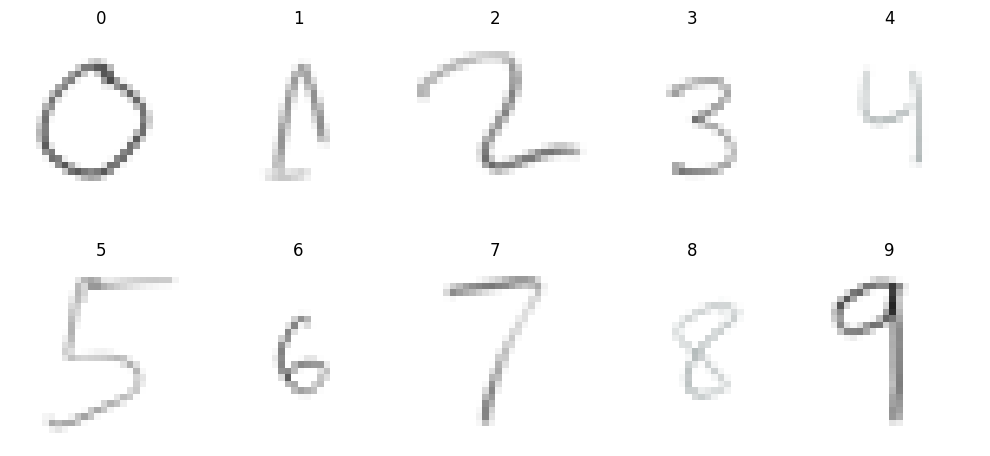

In [3]:
X = []
y = []

for i, c in enumerate(classes):
    files = os.listdir(os.path.join(data_dir, c))
    files = [f for f in files if f.endswith('.png')]
    print(f'{c}: {len(files)}')

    for f in files:
        img = Image.open(os.path.join(data_dir, c, f))
        img = img.resize((28, 28))
        img = np.array(img)
        img = img / 255
        img = img.astype(np.float32)
        # Check the shape of the image after resizing
        X.append(img)
        y.append(i)

# Convert lists to arrays
X = np.array(X)
y = np.array(y)


fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()

for i in range(10):
    
    # print off 1 image from each class
    idx = np.where(y == i)[0][0]
    axes[i].imshow(X[idx])
    axes[i].set_title(classes[y[idx]])
    axes[i].axis('off')
    

plt.tight_layout()
plt.show()


In [4]:
# print the shape of the arrays
print(X.shape)
print(y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# save arrays to npy files
try:
    np.save('npFiles/X_train.npy', X_train)
    np.save('npFiles/X_test.npy', X_test)
    np.save('npFiles/y_train.npy', y_train)
    np.save('npFiles/y_test.npy', y_test)
    np.save('npFiles/classes.npy', classes)
    print('Data saved successfully')
except Exception as e:
    print(f'Error saving data: {e}')


(1000, 28, 28, 4)
(1000,)
Data saved successfully


In [5]:
# Load the data
X_train = np.load('npFiles/X_train.npy')
X_test = np.load('npFiles/X_test.npy')
y_train = np.load('npFiles/y_train.npy')
y_test = np.load('npFiles/y_test.npy')
classes = np.load('npFiles/classes.npy')

print('Data loaded')
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(classes)



Data loaded
(800, 28, 28, 4)
(200, 28, 28, 4)
(800, 10)
(200, 10)
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


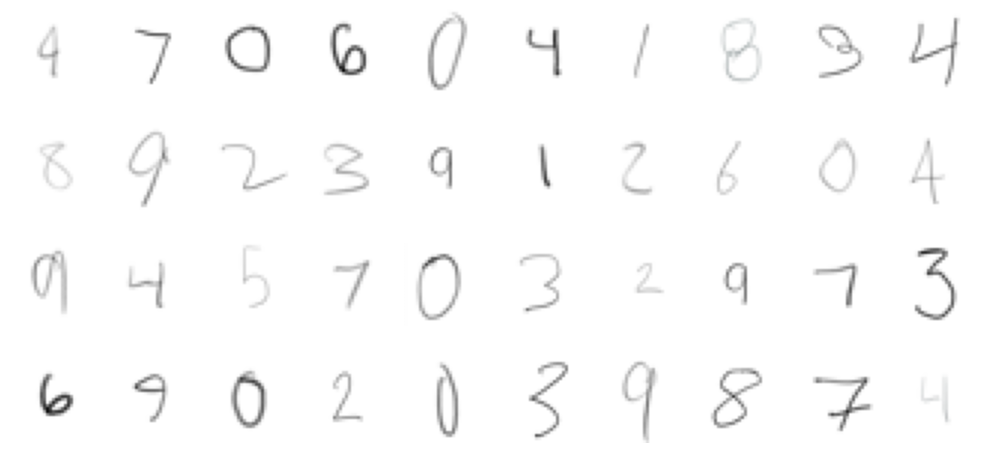

In [6]:
# print a random sample images
fig, axes = plt.subplots(4, 10, figsize=(10, 5))
axes = axes.ravel()

for i in range(40):
    idx = np.random.randint(0, X_train.shape[0])
    axes[i].imshow(X_train[idx])
    #axes[i].set_title(classes[np.argmax(y_train[idx])])
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [7]:
# data augmentation
datagen = ImageDataGenerator(
      rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.2, 
        height_shift_range=0.15)

augmented_X = []
augmented_y = []

# Generate augmented data for each sample in the dataset
for i in range(len(X_train)):
    X_train_example = X_train[i].reshape((1, 28, 28, 4))
    y_train_example = y_train[i].reshape((1, 10))
    num_augmented_samples = 5  # You can adjust the number of augmented samples per original sample
    for _ in range(num_augmented_samples):
        X_train_augmented, y_train_augmented = datagen.flow(X_train_example, y_train_example).__next__()
        # Reshape augmented data to remove extra dimension
        X_train_augmented = X_train_augmented.squeeze(axis=0)
        y_train_augmented = y_train_augmented.squeeze(axis=0)
        augmented_X.append(X_train_augmented)
        augmented_y.append(y_train_augmented)

# Convert lists to numpy arrays
augmented_X = np.array(augmented_X)
augmented_y = np.array(augmented_y)

# Print the shape of the augmented dataset
print("Shape of augmented dataset:", augmented_X.shape)
print("Shape of augmented labels:", augmented_y.shape)

for i, c in enumerate(classes):
    print(f'{c}: {np.sum(np.argmax(augmented_y, axis=1) == i)}')

Shape of augmented dataset: (4000, 28, 28, 4)
Shape of augmented labels: (4000, 10)
0: 400
1: 435
2: 365
3: 395
4: 425
5: 390
6: 375
7: 435
8: 385
9: 395


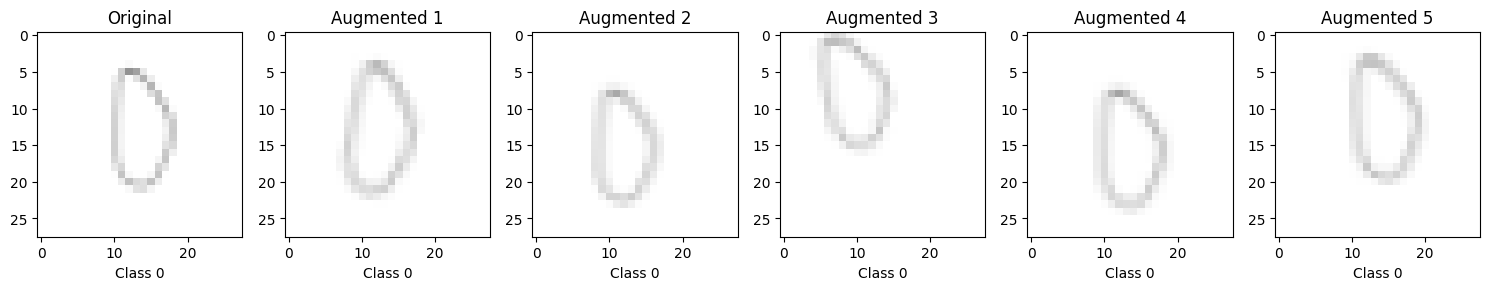

In [8]:

# Define class labels
class_labels = ["Class {}".format(i) for i in range(10)]  # Assuming you have 10 classes

# Choose a random index to visualize
index = np.random.randint(0, len(X_train))

# Original image
plt.figure(figsize=(15, 3))
plt.subplot(1, 6, 1)
plt.imshow(X_train[index])
plt.title('Original')
plt.xlabel(class_labels[np.argmax(y_train[index])])  # Add class label as xlabel

# Augmented images (one from each class)
for i in range(5):
    plt.subplot(1, 6, i + 2)
    plt.imshow(augmented_X[index * 5 + i])
    plt.title('Augmented {}'.format(i + 1))
    plt.xlabel(class_labels[np.argmax(augmented_y[index * 5 + i])])  # Add class label as xlabel

plt.tight_layout()
plt.show()

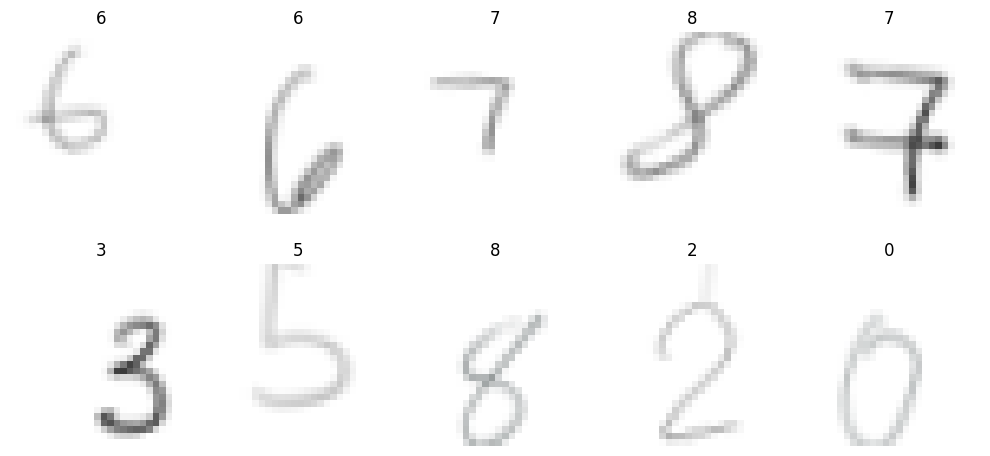

In [9]:
# print images after augmentation
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()

for i in range(10):
    idx = np.random.randint(0, augmented_X.shape[0])
    axes[i].imshow(augmented_X[idx])
    axes[i].set_title(classes[np.argmax(augmented_y[idx])])
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [30]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding="same", activation='relu', input_shape=(28, 28, 4)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


def intialize_model_train(epoch, batch_size):
	print("******* training network *******")
# Compile the model with Adam optimizer
	adam_optimizer = Adam(learning_rate=0.001)  # You can adjust the learning rate as needed
	model.compile(loss="categorical_crossentropy", optimizer=adam_optimizer, metrics=["accuracy"])
	# go through the data 5 times with 128 batch sizes
	H = model.fit(augmented_X,augmented_y, validation_data=(X_test, y_test),
		epochs=epoch, batch_size=batch_size)

	# evaluate the network
	print("******* evaluating network *******")
	predictions = model.predict(X_test, batch_size=batch_size)
	print(classification_report(y_test.argmax(axis=1),
		predictions.argmax(axis=1)))

/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [33]:
intialize_model_train(8,50)

******* training network *******
Epoch 1/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7556 - loss: 0.7058 - val_accuracy: 0.8550 - val_loss: 0.3571
Epoch 2/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8167 - loss: 0.5089 - val_accuracy: 0.8200 - val_loss: 0.4264
Epoch 3/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8357 - loss: 0.4826 - val_accuracy: 0.8800 - val_loss: 0.3177
Epoch 4/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8631 - loss: 0.3983 - val_accuracy: 0.9050 - val_loss: 0.2374
Epoch 5/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8767 - loss: 0.3510 - val_accuracy: 0.9100 - val_loss: 0.2476
Epoch 6/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8909 - loss: 0.3057 - val_accuracy: 0.9300 - val_loss: 0.2284
Epoch 7/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8976 - loss: 0.2768 - val_accuracy: 0.9350 - val_loss: 0.1922
Epoch 8/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9144 - loss: 0.2449 -

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


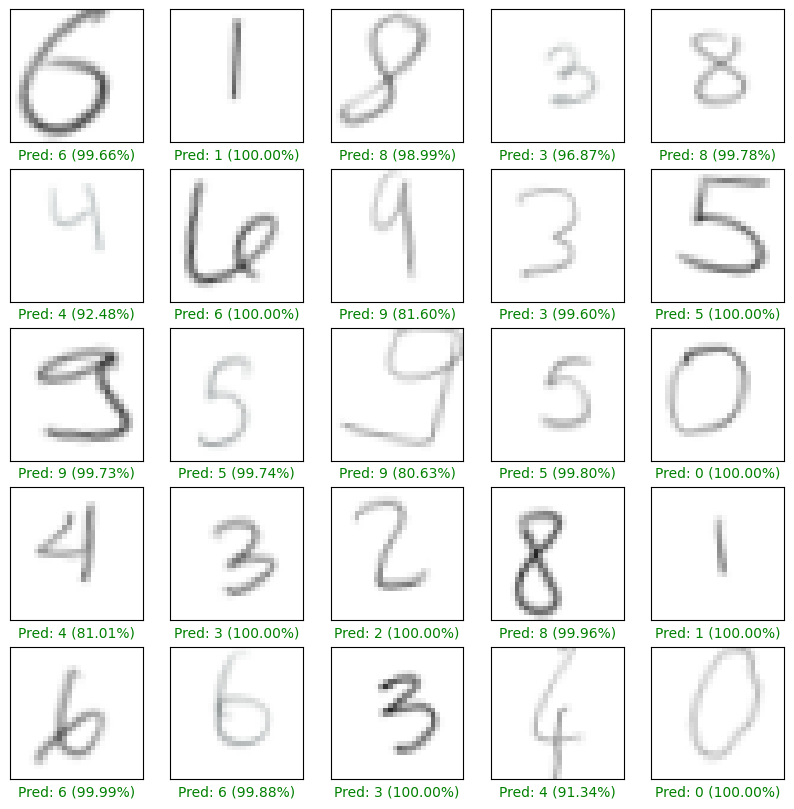

In [34]:
# visualize the model predication 

predictions = model.predict(augmented_X)
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols

plt.figure(figsize=(10, 10))
random_indices = np.random.choice(len(augmented_X), size=num_images, replace=False)  # Randomly select indices
for i, index in enumerate(random_indices):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(augmented_X[index], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions[index])
    true_label = np.argmax(augmented_y[index])
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f'Pred: {predicted_label} ({100*np.max(predictions[index]):.2f}%)', color=color)
    #plt.ylabel(f'True: {true_label}')
plt.show()

In [13]:
def Save_Model(model):
    #os.chdir("SavedModels")
    model.save("SavedModels/NN.keras")

Save_Model(model)